<ipython-input-4-efaa884b5f98>:49: RuntimeWarning: divide by zero encountered in true_divide
  normalized_preactivation_array = np.array(np.divide(bg_subarray, preactivation_array))
<ipython-input-4-efaa884b5f98>:49: RuntimeWarning: invalid value encountered in true_divide
  normalized_preactivation_array = np.array(np.divide(bg_subarray, preactivation_array))
<ipython-input-4-efaa884b5f98>:16: RuntimeWarning: invalid value encountered in less
  mask |= (a < threshmin)
<ipython-input-4-efaa884b5f98>:60: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(threshold_normalized_preactivation_array, photo_activation_array)
<ipython-input-4-efaa884b5f98>:60: RuntimeWarning: invalid value encountered in true_divide
  np.divide(threshold_normalized_preactivation_array, photo_activation_array)


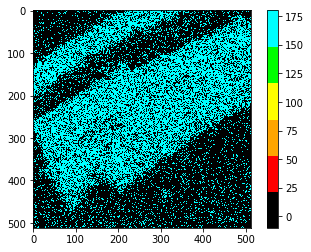

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from matplotlib.colors import ListedColormap

# Discrete color scheme
color_map = ListedColormap(['black','red', 'orange', 'yellow','lime','cyan'])


def threshold(a, threshmin=None, threshmax=None, newval=0):
    """Implements scipy.stats.threshold deprecated package"""
    a = np.asarray(a).copy()
    mask = np.zeros(a.shape, dtype=bool)
    if threshmin is not None:
        mask |= (a < threshmin)
    if threshmax is not None:
        mask |= (a > threshmax)
    a[mask] = newval
    return a


def time_2_peak_color_map(image_name):
    # reads the 3d image stack into an array
    image = io.imread(image_name)
    
    # makes a numpy array
    image_array = np.array(image)
    
    # Finds the minuma column, returning an array of minimum;
    # Also keeps the 2-dimension; axis=1 => y-axis
    background_array_min = np.amin(image_array, axis=1, keepdims=True)
    
    # Adds one dimension to array_min_y, making it 3-dimensional 
    background_array = np.expand_dims(background_array_min, axis=1)
    
    # Subtracts background_array from image_array
    # Returns a numpy array containing values which equal 
    # the intensity value minus the lowest intensity value for each image 
    bg_subarray = np.subtract(image_array, background_array)
    
    # Threshold based on fluorescence intensity
    threshold_bg_subarray = threshold(bg_subarray, 120)
    
    # Preactivation image array
    preactivation_array = np.array(threshold_bg_subarray[0])

    # Normalizes the background subtracted array to the preactivation array
    normalized_preactivation_array = np.array(np.divide(bg_subarray, preactivation_array))

    # Thresholds the normalized array normalized_preactivation_array;
    # each pixel not greater than 1.01 is set to 0
    threshold_normalized_preactivation_array = threshold(normalized_preactivation_array, 1.01)

    # Photo-activation image array
    photo_activation_array = np.array(threshold_normalized_preactivation_array[1])
    
    # Normalizes the threshold array to the photo-activation image
    normalized_photo_activation_array = np.array(
        np.divide(threshold_normalized_preactivation_array, photo_activation_array)
    )
    
    colormap = np.argmax(normalized_photo_activation_array, axis=0)
    plt.imshow((colormap - 1) * 10, cmap=color_map)
    plt.colorbar()
    
    plt.savefig(('tests/'+image_name+'_fig.png'), dpi=300)

time_2_peak_color_map('s_C001.tif')
plt.show()